# Pipelines and Grid Search
*Author: Douglas Strodtman (SaMo)*

Here we'll use the Boston data with `VarianceThreshold`, `SelectKBest`, `StandardScaler`, and `Lasso`.

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_regression
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
boston = pd.read_csv('../data/boston_data.csv')

In [4]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [5]:
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


In [7]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

## Pipeline Syntax

We set up a pipeline by passing a list of tuples in the format
```
('string_name', ClassObject())
```
Note that we can name our steps beforehand (each of the methods that we're using are a class in sklearn).
```
lasso = Lasso()
('lasso', lasso)
```

We can include as many steps as we'd like. Look at the following example:

In [ ]:
# create a pipeline with the following steps using the provided names (and arguments where provided)
#     var_thresh: VarianceThreshold(.05)
#     ss: StandardScaler()
#     kbest: SelectKBest(f_regression, k=5)
#     lasso: Lasso()

In [10]:
pipeline = Pipeline([
   ('var_thresh', VarianceThreshold(threshold=.05)), 
   ('sc', StandardScaler()),
    ('kbest', SelectKBest(f_regression, k=5)),
    ('lasso', Lasso())])

To use this, we just `fit` on our training data.

In [11]:
# fit with our training data
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('var_thresh', VarianceThreshold(threshold=0.05)),
                ('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kbest',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x1a1eebfe60>)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

Then we can `score` on our train

In [12]:
# score training data
pipeline.score(X_train, y_train)

0.6765510818865096

and our test

In [13]:
# score test data
pipeline.score(X_test, y_test)

0.6308606957969359

and in this case conclude that our model is overfit.

## GridSearch Syntax

`GridSearch` accepts a `Pipeline` object as an estimator and a param grid.

The param grid uses the `string_name`s from your pipeline followed by a dunder `__` and the argument name for that particular step. You then provide an iterable to search over (generally a list or a range-style object).

In [ ]:
# set up a param grid with the following:
#     var_thresh: threshold: [0, .05, .1, .25]
#     kbest: k: [3, 5, 7, 9]
#     lasso: alpha: np.logspace(-3, 3, 7)

In [14]:
params = {
    'var_thresh__threshold': [0, .05, .1, .25],
    'kbest__k': [3, 5, 7, 9],
    'lasso__alpha': np.logspace(-3, 3, 7)
}

You can also specify the number of folds using `cv`. Default is 5.

In [16]:
# instantiate our gridsearch with our pipe and params
gs = GridSearchCV(pipeline, param_grid=params, verbose=1)

We use this the same as other models, `fit`ting and `score`ing like normal (but now using the hyperparameters that gave us the best results).

In [17]:
# fit on the training data
gs.fit(X_train, y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:    5.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('var_thresh',
                                        VarianceThreshold(threshold=0.05)),
                                       ('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('kbest',
                                        SelectKBest(k=5,
                                                    score_func=<function f_regression at 0x1a1eebfe60>)),
                                       ('lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, pos...
                                              pre

In [18]:
# score the training data
gs.score(X_train, y_train)

0.699598487142931

In [19]:
# score the test data
gs.score(X_test, y_test)

0.597540811042967

So what are our best parameters?

In [20]:
# look at `.best_params_`
gs.best_params_

{'kbest__k': 7, 'lasso__alpha': 0.1, 'var_thresh__threshold': 0.05}

Note that we'll use our `best_estimator_` to access the `Pipeline` that was fit with our `best_params_`.

Within the `best_estimator_`there is a dictionary called `named_steps`. We can use our `string_names` to access the steps in our `Pipeline`. This is where we'll go to access info about the transformations and parameters done at each step.

In [21]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('var_thresh', VarianceThreshold(threshold=0.05)),
                ('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kbest',
                 SelectKBest(k=7,
                             score_func=<function f_regression at 0x1a1eebfe60>)),
                ('lasso',
                 Lasso(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

`VarianceThreshold` with our best threshold of 0.05 removes one of our columns.

In [24]:
# get_support for our variance threshold step
gs.best_estimator_.named_steps['var_thresh'].get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True])

In [25]:
list(zip(X.columns, gs.best_estimator_.named_steps['var_thresh'].get_support()))

[('CRIM', True),
 (' ZN ', True),
 ('INDUS ', True),
 ('CHAS', True),
 ('NOX', False),
 ('RM', True),
 ('AGE', True),
 ('DIS', True),
 ('RAD', True),
 ('TAX', True),
 ('PTRATIO', True),
 ('LSTAT', True)]

`SelectKBest` with `k` of 9 removed several of our columns. We can use this boolean list to align our coefficients with our original features (as our modeling step will only see these 9 features).

In [26]:
# get_support for our k best step
gs.best_estimator_.named_steps['kbest'].get_support()

array([ True, False,  True, False,  True, False, False,  True,  True,
        True,  True])

In [27]:
list(zip(X.columns, gs.best_estimator_.named_steps['kbest'].get_support()))

[('CRIM', True),
 (' ZN ', False),
 ('INDUS ', True),
 ('CHAS', False),
 ('NOX', True),
 ('RM', False),
 ('AGE', False),
 ('DIS', True),
 ('RAD', True),
 ('TAX', True),
 ('PTRATIO', True)]

Here our `Lasso` uses an alpha of .001. We can look at the `coef_` to see how our features are weighted.

In [28]:
# look at the lasso coefficients
gs.best_estimator_.named_steps['lasso'].coef_

array([-0.        ,  0.24848209,  3.15039336,  1.07580592, -0.91358502,
       -2.07897961, -4.76130959])

In [30]:
list(zip(X.columns, gs.best_estimator_.named_steps['lasso'].coef_))

[('CRIM', -0.0),
 (' ZN ', 0.24848209321757456),
 ('INDUS ', 3.150393356344159),
 ('CHAS', 1.0758059168713165),
 ('NOX', -0.9135850245661219),
 ('RM', -2.078979612960309),
 ('AGE', -4.761309593249007)]

In [31]:
# look at the lasso y intercept
gs.best_estimator_.named_steps['lasso'].intercept_

22.835028248587562

The following code demonstrates using these methods to align our original columns with our final betas.

In [33]:
columns = X.columns
columns = columns[gs.best_estimator_.named_steps['var_thresh'].get_support()]
columns = columns[gs.best_estimator_.named_steps['kbest'].get_support()]

pd.DataFrame(gs.best_estimator_.named_steps['lasso'].coef_, 
             index = columns, 
             columns=['weight'])

,weight
CRIM,-0.000000
INDUS,0.248482
RM,3.150393
RAD,1.075806
TAX,-0.913585
PTRATIO,-2.078980
LSTAT,-4.761310


This is a simple scatter plot to compare our true values to our predictions to visualize our errors.

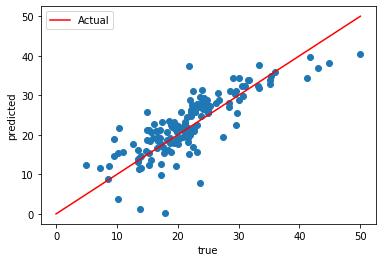

In [35]:
plt.scatter(y_test, gs.predict(X_test))
plt.ylabel('predicted')
plt.xlabel('true')
plt.plot([0, 50], [0, 50], color='r')
plt.legend(['Actual']);